# Table of Contents
 <p>

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sympy import init_printing, Matrix, symbols, sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
init_printing(use_latex = 'mathjax')

In [37]:
%qtconsole

In [38]:
%%javascript
console.log($("div#notebook-container").width(1700))

<IPython.core.display.Javascript object>

In [82]:
tceColmns = pd.read_csv("../../../data/tce_computed/v2/tce_collist_v2.csv")
tceRawData = pd.read_csv("../../../data/tce_computed/v2/tce_rawdata_v2.csv")
tceTransformedData = pd.read_csv("../../../data/tce_computed/v2/tce_pcaTransformedData_v2.csv")
tceEigenvalues = pd.read_csv("../../../data/tce_computed/v2/tce_eigenvalues_v2.csv")
correlation = pd.read_csv("../../../data/tce_computed/v2/tce_Parameter_PC_correlation_v2.csv", index_col=0)

In [83]:
tceEigenvalues

,Component,Eigenvalue,Proportion (%),Cumulative (%)
0,PC1,2.368610,21.53,21.53
1,PC2,1.739799,15.82,37.35
2,PC3,1.572051,14.29,51.64
3,PC4,1.111734,10.11,61.75
4,PC5,0.999271,9.08,70.83
5,PC6,0.912886,8.30,79.13
6,PC7,0.717860,6.53,85.66
7,PC8,0.616801,5.61,91.27
8,PC9,0.516575,4.70,95.97
9,PC10,0.270715,2.46,98.43


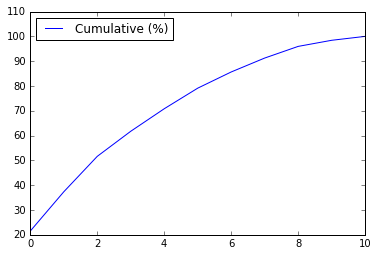

In [84]:
# tceEigenvalues[['Proportion (%)', 'Cumulative (%)']].plot()
tceEigenvalues[['Cumulative (%)']].plot()
# tceEigenvalues[['Proportion (%)']].plot()

In [88]:
ncorr = correlation[["PC%s" % (i) for i in range(len(correlation.columns))]][:20]

In [89]:
ncorr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
tce_sma,2.607029e-01,-4.507375e-01,6.430728e-01,1.217344e-02,-1.116440e-02,-2.956414e-01,5.488561e-02,-1.240967e-01,-4.189842e-01,1.808543e-01,-3.133629e-02
tce_incl,3.738166e-01,-7.772016e-01,-2.493935e-01,-3.415865e-02,-2.759033e-02,1.521468e-01,1.243795e-01,1.212780e-01,-1.819750e-01,-3.039981e-01,1.150500e-01
tce_duration,3.111129e-01,-1.953046e-01,6.466356e-01,5.278054e-03,-4.117115e-02,4.193580e-01,-2.119549e-02,-4.146070e-01,3.024470e-01,-7.406459e-02,5.944272e-03
tce_ror,8.892673e-01,2.239744e-01,-1.123505e-01,1.083321e-01,6.563057e-03,-1.112228e-01,-1.066104e-01,1.472991e-02,-3.066970e-02,-1.471853e-01,-2.967830e-01
tce_ldm_coeff4,-2.273244e-01,3.626875e-01,1.099037e-03,6.766869e-01,-8.609919e-02,4.846338e-01,-2.211986e-03,-4.714792e-02,-3.373448e-01,-2.372093e-02,-1.629073e-04
tce_model_snr,5.992952e-01,2.823951e-01,-1.455389e-01,1.702732e-01,-2.832493e-02,-8.017183e-02,6.908330e-01,-5.656863e-02,8.998410e-02,9.275550e-02,8.088805e-02
tce_ingress,5.009041e-01,2.136151e-01,4.221606e-01,-2.599540e-01,-9.756186e-03,3.876558e-01,-5.725296e-02,5.392550e-01,-7.899857e-03,1.054180e-01,4.523916e-02
tce_max_sngle_ev,2.261106e-02,-2.570672e-02,2.306489e-02,8.552792e-02,9.931845e-01,6.280492e-02,2.096727e-02,-5.591300e-03,-1.137410e-02,1.136453e-03,4.416790e-03
tce_impact,-6.704207e-02,7.444497e-01,3.895125e-01,-3.270995e-01,3.853734e-02,-2.166698e-01,3.085130e-02,-1.020070e-01,-1.899706e-01,-2.726366e-01,1.112576e-01
tce_depth,7.401338e-01,1.296559e-01,-1.987358e-01,2.872897e-01,-3.229677e-03,-2.036617e-01,-4.518856e-01,-1.012953e-01,3.861740e-02,7.517949e-02,2.242029e-01


In [90]:
def formatcell(val):
    if val > 0.0:
        color = 'background-color: skyblue; color: black' if val >= 0.4  else 'color: black'
        color = 'background-color: deepskyblue; color: black' if val > 0.7 else color
    else: 
        color = 'background-color: lemonchiffon; color: black' if np.abs(val) >= 0.4  else 'color: black'
        color = 'background-color: moccasin; color: black' if np.abs(val) > 0.7 else color        
    return color
ncorr.style.applymap(formatcell)

In [95]:
for norm, name in zip((True, False), ('normalize', 'notnormalize')):
    print norm
    print name

True
normalize
False
notnormalize
